# sentiment analysis for different News users in twitter

In [ ]:
# importing all dependencies
import tweepy
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
#style.use("ggplot")


In [ ]:
# used  appropriate methods from vadersentiment to analyze data

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [ ]:
# twitter consumer keys and access tokens initialized in environmental variables

In [7]:
consumer_key = os.environ['twitter_consumer_key']
consumer_secret=os.environ['twitter_consumer_secret']
access_token = os.environ['access_token']
access_token_secret=os.environ['access_token_secret']

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [ ]:
# Analyzing postive,negative,neutral and compund values by using .user_timeline method from vadersentiment file.
# here i have taken 5 differnet news twitter accounts for analyzing. created a sentiment dict to append all output values.

In [41]:
#twitter users
target_user = ("@CNN","@BBC","@CBS","@Fox","@nytimes")
counter = 1

#variable to hold sentiments
sentiments = []

for target in target_user:
    old_tweet = None
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list =  []
    
#loop through 5 pages if tweets for 100 tweets
    for page in range(5):
    
         tweets_user = api.user_timeline(target,count=20,
                                   max_id = old_tweet)
         for tweets in tweets_user:
                results = analyzer.polarity_scores(tweets['text'])
                compound_list = results['compound']
                positive_list = results['pos']
                negative_list = results['neg']
                neutral_list = results['neu']
                tweets_ago = counter
                #print(tweets['text'])
                
                #create a sentiments dictionary
                sentiments.append({'Date':tweets['created_at'],
                                   "text":tweets['text'],
                            "Compound":compound_list,
                            "User":target,        
                            "Positive":positive_list,
                            "Negative":negative_list,
                            "Neutral":neutral_list,
                            "Tweets_ago":counter})
       
                counter = counter + 1
         old_tweet = int(tweets['id_str']) - 1
#print(tweets['text'])
     
         
    #print(sentiments)                  


In [ ]:
# created a data frame for sentiment dict

In [42]:
senti_df = pd.DataFrame.from_dict(sentiments)
senti_df.head()


,Compound,Date,Negative,Neutral,Positive,Tweets_ago,User,text
0,-0.7351,Mon Mar 12 00:11:04 +0000 2018,0.246,0.754,0.000,1,@CNN,"In politics today, ""everybody is feeding ... o..."
1,0.0000,Mon Mar 12 00:00:28 +0000 2018,0.000,1.000,0.000,2,@CNN,The #VanJonesShow with @Oprah and @Ava starts ...
2,0.4215,Sun Mar 11 23:58:43 +0000 2018,0.106,0.664,0.230,3,@CNN,JUST IN: The White House unveils new gun and s...
3,0.3612,Sun Mar 11 23:45:04 +0000 2018,0.000,0.821,0.179,4,@CNN,Join CNN’s group in the #MarchMadness Bracket ...
4,-0.1027,Sun Mar 11 23:30:15 +0000 2018,0.104,0.896,0.000,5,@CNN,President Trump hits EU on trade days after im...


In [ ]:
#writing senti_df data frame to csv file

In [43]:
tw=senti_df.to_csv("twitter_homework.csv", sep=",", encoding = 'utf-8')

In [ ]:
#sorting each user by using loc function to plot a graph

In [44]:
# @BBC USER
senti_bbc = senti_df.loc[senti_df["User"]=='@BBC']
senti_bbc.head()

,Compound,Date,Negative,Neutral,Positive,Tweets_ago,User,text
100,0.6068,Sun Mar 11 21:39:32 +0000 2018,0.000,0.763,0.237,101,@BBC,"RT @bbcthree: ""I felt completely overwhelmed a..."
101,0.6908,Sun Mar 11 21:22:19 +0000 2018,0.000,0.678,0.322,102,@BBC,"🎤✨ Catch the best performances, exclusive back..."
102,0.3612,Sun Mar 11 21:02:37 +0000 2018,0.000,0.848,0.152,103,@BBC,RT @BBCOne: Here's to the memories. ❤️\nThank ...
103,0.8610,Sun Mar 11 20:00:07 +0000 2018,0.000,0.570,0.430,104,@BBC,Join host @TessDaly for a very special event h...
104,0.7650,Sun Mar 11 19:54:20 +0000 2018,0.048,0.662,0.290,105,@BBC,RT @bbcouch: ‘I couldn’t reach Millie in her t...


In [45]:
# @CNN USER
senti_cnn = senti_df.loc[senti_df['User']=='@CNN']
senti_cnn.head()

,Compound,Date,Negative,Neutral,Positive,Tweets_ago,User,text
0,-0.7351,Mon Mar 12 00:11:04 +0000 2018,0.246,0.754,0.000,1,@CNN,"In politics today, ""everybody is feeding ... o..."
1,0.0000,Mon Mar 12 00:00:28 +0000 2018,0.000,1.000,0.000,2,@CNN,The #VanJonesShow with @Oprah and @Ava starts ...
2,0.4215,Sun Mar 11 23:58:43 +0000 2018,0.106,0.664,0.230,3,@CNN,JUST IN: The White House unveils new gun and s...
3,0.3612,Sun Mar 11 23:45:04 +0000 2018,0.000,0.821,0.179,4,@CNN,Join CNN’s group in the #MarchMadness Bracket ...
4,-0.1027,Sun Mar 11 23:30:15 +0000 2018,0.104,0.896,0.000,5,@CNN,President Trump hits EU on trade days after im...


In [ ]:
# Scatter plot for "@CNN. x-axis = length of Compound, y-axis =compound values

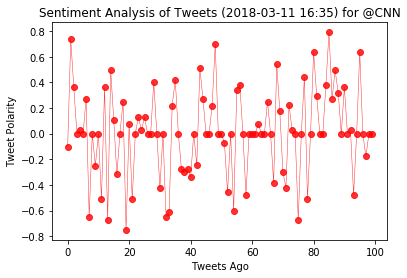

In [13]:
#plt.plot(np.arange(len(senti_bbc["Compound"])),
                  #senti_bbc["Compound"],marker = 'o', color='blue', linewidth=0.5,alpha=0.8)
plt.plot(np.arange(len(senti_cnn["Compound"])),
                  senti_cnn["Compound"],marker = 'o', color='red', linewidth=0.5,alpha=0.8)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, "@CNN"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("CNN.png")
plt.show()

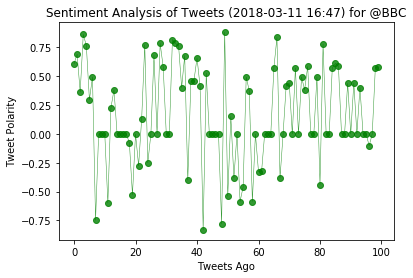

In [32]:
# Scatter plot for "@CNN. x-axis = length of Compound, y-axis =compound values
plt.plot(np.arange(len(senti_bbc["Compound"])),
                  senti_bbc["Compound"],marker = 'o', color='green', linewidth=0.5,alpha=0.8)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, "@BBC"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("BBC.png")
plt.show()

In [46]:
# @CBS
senti_cbs = senti_df.loc[senti_df['User']=='@CBS']
senti_cbs.head()

,Compound,Date,Negative,Neutral,Positive,Tweets_ago,User,text
200,0.4926,Fri Mar 09 22:48:26 +0000 2018,0.000,0.883,0.117,201,@CBS,RT @DierksBentley: Take and post a photo of th...
201,0.1275,Fri Mar 09 22:24:20 +0000 2018,0.092,0.795,0.113,202,@CBS,RT @MomCBS: If you missed guest star @KChenowe...
202,0.4215,Fri Mar 09 21:10:21 +0000 2018,0.000,0.823,0.177,203,@CBS,"Give a round of applause to @KelseaBallerini, ..."
203,0.8658,Fri Mar 09 18:27:28 +0000 2018,0.000,0.553,0.447,204,@CBS,"RT @thegoodfight: Smart, sexy, and sophisticat..."
204,0.0000,Fri Mar 09 16:02:27 +0000 2018,0.000,1.000,0.000,205,@CBS,RT @BlueBloods_CBS: Even stand-up guys fall do...


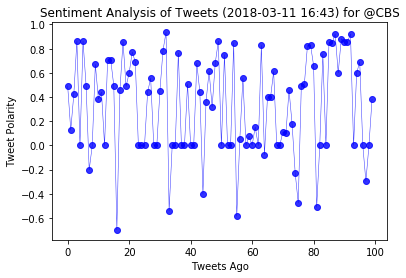

In [21]:
# Scatter plot for "@Cbs. x-axis = length of Compound, y-axis =compound values
plt.plot(np.arange(len(senti_cbs["Compound"])),
                   senti_cbs["Compound"],marker = 'o', color='blue', linewidth=0.5,alpha=0.8)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, "@CBS"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("CBS.png")
plt.show()

         
         

In [47]:
# @Fox
senti_fox = senti_df.loc[senti_df['User']=='@Fox']
senti_fox.head()

,Compound,Date,Negative,Neutral,Positive,Tweets_ago,User,text
300,0.0772,Sun Mar 11 23:45:08 +0000 2018,0.000,0.936,0.064,301,@Fox,RT @incantatricks: Society expects women to be...
301,-0.2960,Sun Mar 11 23:10:30 +0000 2018,0.136,0.864,0.000,302,@Fox,"RT @ChloeCondon: Hey ladies, come work in tech..."
302,0.6996,Sun Mar 11 06:15:00 +0000 2018,0.000,0.509,0.491,303,@Fox,Friends: excited for the long weekend!\nMe: ht...
303,0.0000,Sat Mar 10 08:34:51 +0000 2018,0.000,1.000,0.000,304,@Fox,RT @lrnrd: THIS THREAD 🍿🔥🙏🏻👏💯 https://t.co/vhf...
304,-0.2957,Sat Mar 10 06:41:48 +0000 2018,0.177,0.725,0.098,305,@Fox,RT @ChloeCondon: Booth recruiter 🧔: ...and we ...


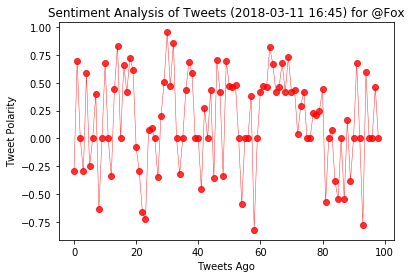

In [28]:
# Scatter plot for "@Fox. x-axis = length of Compound, y-axis =compound values
plt.plot(np.arange(len(senti_fox["Compound"])),
                   senti_fox["Compound"],marker = 'o', color='red', linewidth=0.5,alpha=0.8)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, "@Fox"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Fox.png")
plt.show()

In [30]:
# @nytimes
senti_nytimes = senti_df.loc[senti_df['User']=='@nytimes']
senti_nytimes.head()

,Compound,Date,Negative,Neutral,Positive,Tweets_ago,User
399,0.0000,Sun Mar 11 23:20:56 +0000 2018,0.000,1.000,0.00,400,@nytimes
400,0.0000,Sun Mar 11 23:00:30 +0000 2018,0.000,1.000,0.00,401,@nytimes
401,0.2500,Sun Mar 11 22:43:40 +0000 2018,0.155,0.655,0.19,402,@nytimes
402,0.0000,Sun Mar 11 22:29:16 +0000 2018,0.000,1.000,0.00,403,@nytimes
403,0.2484,Sun Mar 11 22:18:24 +0000 2018,0.122,0.698,0.18,404,@nytimes


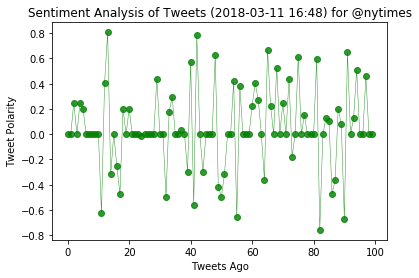

In [33]:
# Scatter plot for "@nytimes. x-axis = length of Compound, y-axis =compound values
plt.plot(np.arange(len(senti_nytimes["Compound"])),
                   senti_nytimes["Compound"],marker = 'o', color='green', linewidth=0.5,alpha=0.8)
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now, "@nytimes"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("nytimes.png")
plt.show()

In [ ]:
api.update_with_media("BBC.png")